Logistic Regression Accuracy: 0.8155
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Confusion Matrix:
[[1559   48]
 [ 321   72]]
--------------------------------------------------
Random Forest Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1545   62]
 [ 209  184]]
--------------------------------------------------
Gradient Boosting Accuracy: 0.8660
              precision    recall  f1-score   suppo

C:\Users\ludhi\AppData\Local\Temp\ipykernel_5404\3522559994.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='coolwarm')


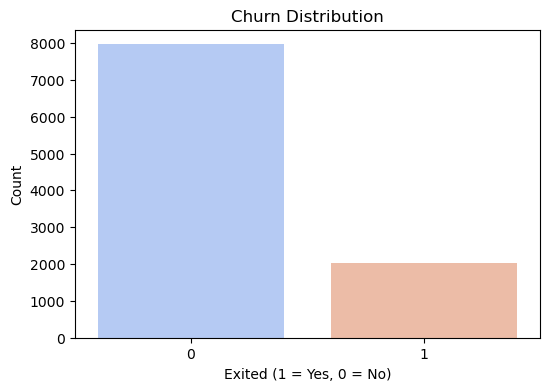

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Drop unnecessary columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
# Encode categorical variables
label_enc = LabelEncoder()
df["Geography"] = label_enc.fit_transform(df["Geography"])
df["Gender"] = label_enc.fit_transform(df["Gender"])

# Split dataset into features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.xlabel("Exited (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()